## Importing Dependencies

In [1]:
import keras,os
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Activation,Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint

## Resizing input to 224,224

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_path = train_datagen.flow_from_directory('train',
                                                 target_size = (224,224),
                                                 batch_size = 32)

Found 8000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_path = test_datagen.flow_from_directory('test',
                                            target_size = (224,224),
                                            batch_size = 32)                                            

Found 2000 images belonging to 2 classes.


## Implementing Vgg16

In [17]:
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(units=768, activation='relu', name='fc1'))
    model.add(Dense(units=256, activation='relu', name='fc2'))
    model.add(Dense(units=2, activation='softmax', name='output'))
    return model

In [18]:
model=VGG16()

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)      

In [20]:
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [21]:
Vgg16.load_weights("vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [22]:
for layer in Vgg16.layers:
    layer.trainable = False

In [23]:
for layer in model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000021F040CED30> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000021FD8CAC0A0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000021FD8CAC730> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000021FD8CB4C70> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000021FD8CBFFD0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000021FD8CB4D30> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000021FD8CCE670> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000021FD8CDC0D0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000021FD8CD67F0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000021FD8CBF460> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000021FD8CF5130> False
<tensorflow.python.ke

In [24]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [25]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [26]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [27]:
H = model.fit_generator(train_path,validation_data=test_path,epochs=100,verbose=1,callbacks=[mc,es])

C:\Users\Anshuman\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
250/250 [==============================] - 104s 411ms/step - loss: 0.4190 - accuracy: 0.8553 - val_loss: 0.2622 - val_accuracy: 0.8900
Epoch 2/100
250/250 [==============================] - 80s 320ms/step - loss: 0.2060 - accuracy: 0.9121 - val_loss: 0.1953 - val_accuracy: 0.9185
Epoch 3/100
250/250 [==============================] - 82s 326ms/step - loss: 0.1861 - accuracy: 0.9221 - val_loss: 0.1835 - val_accuracy: 0.9255
Epoch 4/100
250/250 [==============================] - 82s 328ms/step - loss: 0.1640 - accuracy: 0.9305 - val_loss: 0.1677 - val_accuracy: 0.9330
Epoch 5/100
250/250 [==============================] - 82s 329ms/step - loss: 0.1447 - accuracy: 0.9429 - val_loss: 0.1833 - val_accuracy: 0.9335
Epoch 6/100
250/250 [==============================] - 83s 330ms/step - loss: 0.1514 - accuracy: 0.9385 - val_loss: 0.1949 - val_accuracy: 0.9190
Epoch 7/100
250/250 [==============================] - 82s 327ms/step - loss: 0.1253 - accuracy: 0.9505 - val_loss: 0.1809 

In [28]:
model.evaluate_generator(test_path)

C:\Users\Anshuman\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.32082223892211914, 0.921500027179718]

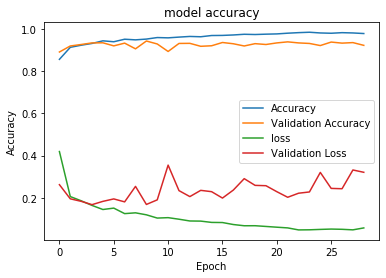

In [32]:
import matplotlib.pyplot as plt
plt.plot(H.history["accuracy"])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

dog


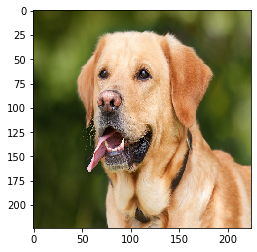

In [33]:
from keras.preprocessing import image
img = image.load_img("image.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("best_model.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')